### Task 7: Walmart Sales Forecasting (Time Features + Lags + Regression)

Goal: Predict future weekly sales from historical data using time-based features (day/month/week) and lag values, then plot actual vs predicted.


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
# Load datasets
train = pd.read_csv("train.csv")
features = pd.read_csv("features.csv")
stores = pd.read_csv("stores.csv")

In [ ]:
# Merge datasets 
df = train.merge(features, on=["Store", "Date"], how="left")
df = df.merge(stores, on="Store", how="left")

# Convert Date to datetime
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values("Date")

In [ ]:
print(train.shape)
train.head()

(421570, 5)


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [ ]:
# Feature engineering
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Week"] = df["Date"].dt.isocalendar().week.astype(int)

# Lag feature: previous week's sales
df["Lag_Sales"] = df.groupby("Store")["Weekly_Sales"].shift(1)

# Drop missing rows (from lagging)
df = df.dropna()

In [ ]:
# Define features & target
X = df[["Store", "Dept", "Year", "Month", "Week", "Lag_Sales", "Temperature", "Fuel_Price", "CPI", "Unemployment"]]
y = df["Weekly_Sales"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
# Train RandomForest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [ ]:
# Predictions
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 5521.395161806906


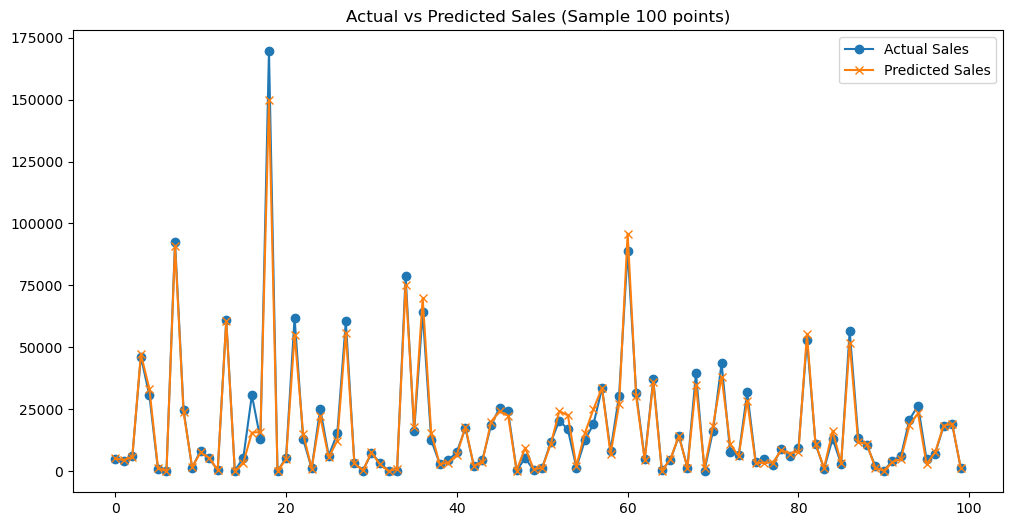

In [ ]:
# Plot Actual vs Predicted
plt.figure(figsize=(12,6))
plt.plot(y_test.values[:100], label="Actual Sales", marker='o')
plt.plot(y_pred[:100], label="Predicted Sales", marker='x')
plt.legend()
plt.title("Actual vs Predicted Sales (Sample 100 points)")
plt.show()